# Case Study on Measures of Central Tendency and Dispersion

An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
   - Gender
   - Test preparation course
4. What do you think about the scoring variation for math, reading and writing
    based on
    - Gender
    -Test preparation course
5. The management needs your help to give bonus points to the top 25% of
    students based on their maths score, so how will you help the management
     to achieve this.

## Students Performance Dataset

   Students Perfomance dataset is a dataset that contains students’ result in various subjects, as well as some properties of the students.There are 3 subjects scores provided : math scores, reading scores, and writing scores.There are 5 properties provided : gender, race/ethnicity, parental level of education, lunch, and test preparation course. 

In [5]:
 #import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
# Read the data
df=pd.read_csv('StudentsPerformance.csv')

In [7]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [8]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [9]:
#checking for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [11]:
#renaming the columns
column_names=df.columns
for column in column_names:
    new_name = column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [12]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1.Find out how many males and females participated in the test.

In [14]:
count=df.gender.value_counts()
count

female    518
male      482
Name: gender, dtype: int64

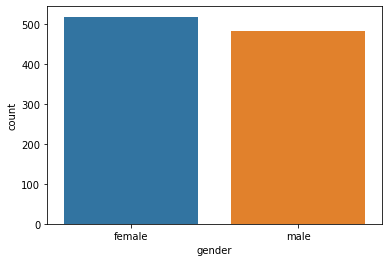

In [15]:
plt.figure()
sns.countplot(df['gender'])
plt.show()


**Findings:**
- From the count, we see that of out of 1000 students, 518 are Females and 482 are Males.

## 2. What do you think about the students' parental level of education?

In [16]:
df.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

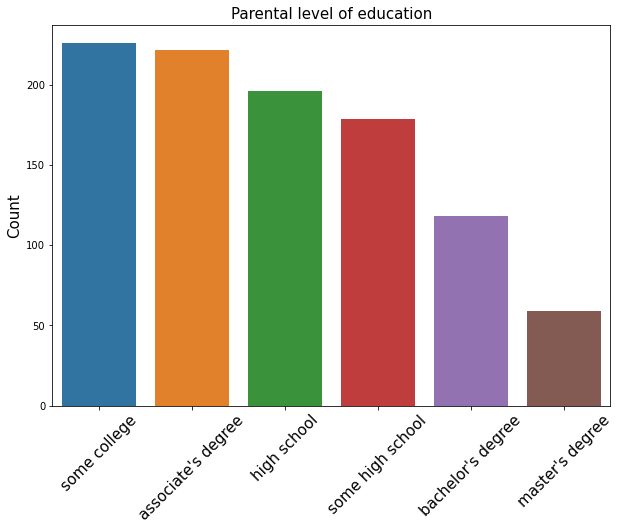

In [17]:
plt.figure(figsize=(10,7))
sns.barplot(x=df.parental_level_of_education.value_counts().index,y=df.parental_level_of_education.value_counts().values)
plt.xticks(rotation=45,fontsize=15)

plt.ylabel('Count',fontsize=15)
plt.title('Parental level of education',fontsize=15)
plt.show()

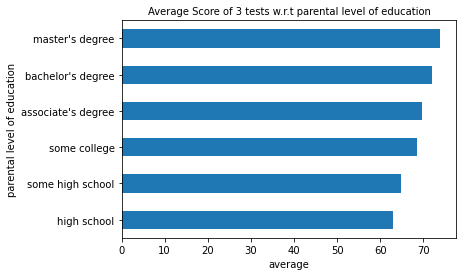

In [45]:
df.groupby('parental_level_of_education').mean()['average_score'].sort_values().plot(kind='barh')
plt.title("Average Score of 3 tests w.r.t parental level of education",fontsize=10)
plt.xlabel("average",fontsize=10)
plt.ylabel("parental level of education",fontsize=10)
plt.show()

**Findings:**
- Only 5.9% of the parents have attained a Master's Degree. 
- Majority of the parents have at least some college or associate's degree.
- children of parent with College education score better overall. another observation is that children of parents having "some highschool" get more marks than children of parents having "high school".

## 3. Who scores the most on average for math, reading and writing based on
- **Gender**
- **Test preparation course**

###  Based on gender

In [18]:
#calculating the average of the math score, reading score and writing score
df['average_score'] = df[['math_score', 'reading_score','writing_score']].mean(axis=1)
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


In [ ]:
df.head()

In [19]:
#to know average mark of female and male in math,reading&writing test and also average of 3 test scores
df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().round(1)

,math_score,reading_score,writing_score,average_score
gender,,,,
female,63.4,72.6,72.5,69.5
male,68.8,65.5,63.4,65.9


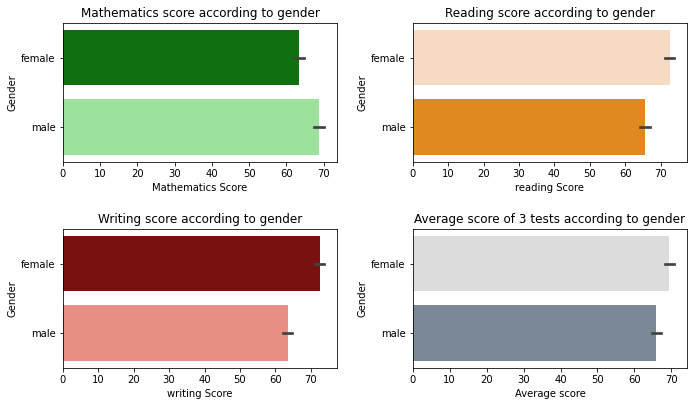

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))


sns.barplot(y='gender', x='math_score', palette=["g", "lightgreen"], data=df, ax=axes[0,0]);
axes[0,0].set_xlabel('Mathematics Score')
axes[0,0].set_ylabel('Gender')
axes[0,0].set_title("Mathematics score according to gender")

axes[0,1].set_title("Reading score according to gender")
sns.barplot(y='gender', x='reading_score', palette=["peachpuff", "darkorange"], data=df, ax=axes[0,1]);
axes[0,1].set_xlabel('reading Score')
axes[0,1].set_ylabel('Gender')

axes[1,0].set_title("Writing score according to gender")
sns.barplot(y='gender', x='writing_score', palette=["darkred", "salmon"], data=df, ax=axes[1,0]);
axes[1,0].set_xlabel('writing Score')
axes[1,0].set_ylabel('Gender')

axes[1,1].set_title("Average score of 3 tests according to gender")
sns.barplot(y='gender', x='average_score', palette=["gainsboro", "lightslategray"], data=df, ax=axes[1,1]);
axes[1,1].set_xlabel('Average score')
axes[1,1].set_ylabel('Gender')


plt.tight_layout(pad=2);

**Finding**
- Male students obtained higher marks on the mathematics exam. 
- Female students did better on reading and writing exams and, on average of 3 tests also, received higher marks than male students.

###  Based on test preparation course

In [23]:
#to know average scores of students with test preparation course 
df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().round(1)

,math_score,reading_score,writing_score,average_score
test_preparation_course,,,,
completed,70.0,74.2,74.7,72.9
none,63.8,66.4,64.5,64.9


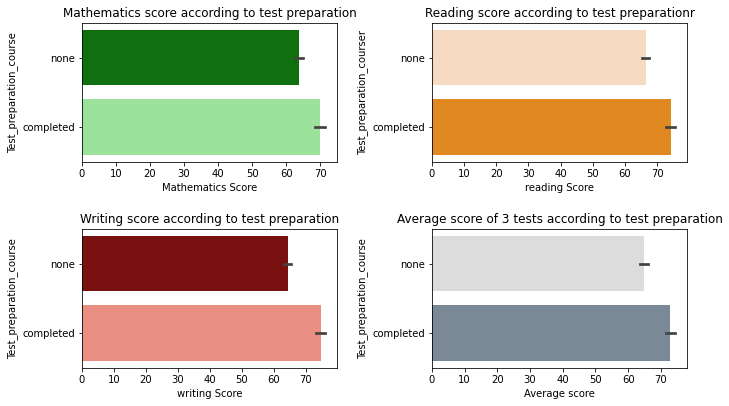

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))


sns.barplot(y='test_preparation_course', x='math_score', palette=["g", "lightgreen"], data=df, ax=axes[0,0]);
axes[0,0].set_xlabel('Mathematics Score')
axes[0,0].set_ylabel('Test_preparation_course')
axes[0,0].set_title("Mathematics score according to test preparation")

axes[0,1].set_title("Reading score according to test preparationr")
sns.barplot(y='test_preparation_course', x='reading_score', palette=["peachpuff", "darkorange"], data=df, ax=axes[0,1]);
axes[0,1].set_xlabel('reading Score')
axes[0,1].set_ylabel('Test_preparation_courser')

axes[1,0].set_title("Writing score according to test preparation")
sns.barplot(y='test_preparation_course', x='writing_score', palette=["darkred", "salmon"], data=df, ax=axes[1,0]);
axes[1,0].set_xlabel('writing Score')
axes[1,0].set_ylabel('Test_preparation_course')

axes[1,1].set_title("Average score of 3 tests according to test preparation")
sns.barplot(y='test_preparation_course', x='average_score', palette=["gainsboro", "lightslategray"], data=df, ax=axes[1,1]);
axes[1,1].set_xlabel('Average score')
axes[1,1].set_ylabel('Test_preparation_course')


plt.tight_layout(pad=2);

**Findings**
- In all the tests, on average, the students who have completed the 'Test Prep Course' have performed distinctly well than participants who haven't completed the prep course.

## What do you think about the scoring variation for math, reading and writing  based on
 - **Gender**
 - **Test preparation course**

### Based on gender

In [43]:
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].agg(['min','max','std'])

math_score                 reading_score                 writing_score  \
              min  max        std           min  max        std           min   
gender                                                                          
female          0  100  16.029928            17  100  14.411018            10   
male           27  100  14.556411            23  100  14.149594            15   

                        
        max        std  
gender                  
female  100  14.844842  
male    100  14.227225

**Findings**
- Math score for Female participants lies in a range of 0 to 100 whereas Math score for Male participants falls in a range    of 27 to 100.
- Reading score for Female participants lies in a range of 17 to 100 whereas Reading score for Male participants falls in a   range of 23 to 100.
-  Writing score for Female participants lies in a range of 10 to 100 whereas Math score for Male participants falls in a      range of 15 to 100.
- From the standard deviation for math score based on gender ,we can say that the data is slightly more dispersed in the case of female students than in male students.
- From the standard deviation for writing and reading score based on gender,the data is equally dispersed in the case of female students and male students.

### Based on Test preparation course

In [42]:
df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].agg(['min','max','std'])

math_score                 reading_score       \
                               min  max        std           min  max   
test_preparation_course                                                 
completed                       23  100  14.521847            37  100   
none                             0  100  15.705689            17  100   

                                   writing_score                  
                               std           min  max        std  
test_preparation_course                                           
completed                13.537572            36  100  13.236412  
none                     14.608896            10  100  15.041667

**Findings**
- Math score for participants who completed the course lies in a range of 23 to 100 whereas Math score for participants who didnt do the course falls in a range of 0 to 100.
- In all the three tests, we see that some students scored 100 marks even without any prep course.
- Reading score for participants who completed course lies in a range of 37 to 100 whereas Reading score for None-status participants falls in a range of 10 to 100.
- Writing score for course completed participants lies in a range of 36 to 100 whereas Math score for None-status participants falls in a range of 17 to 100.
- Standard deviation for all the test grouped by test preparation course for completed students are lower than that for unattended students.


## The management needs your help to give bonus points to the top 25% ofstudents based on their maths score, so how will you help the management to achieve this.

In [32]:
#sort the data in descending order based on the values in 'Math Score' column.
sort_df = df.sort_values('math_score',ascending=False)
sort_df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
515,female,group E,some college,standard,none,100,92,97,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000


In [33]:
#o find the 75th percentile for Math Score.
sort_df['math_score'].quantile([.75,]).to_frame()

,math_score
0.75,77.0


In [34]:
#filter the dataframe for values of Math Score >= 77
sort_df = sorted_df[sorted_df['math_score'] >= 77.0]
sort_df.reset_index().

,index,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
1,996,male,group A,some college,standard,completed,100,96,86,94.000000
2,515,female,group E,some college,standard,none,100,92,97,96.333333
3,517,female,group E,associate's degree,standard,none,100,100,100,100.000000
4,516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
...,...,...,...,...,...,...,...,...,...,...
250,851,male,group D,some college,standard,completed,77,62,62,67.000000
251,849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667
252,850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333
253,421,female,group C,some college,free/reduced,none,77,90,91,86.000000


In [35]:
#The number of students will sometimes be more than 250  because some participants may have 
#the same score for Math Score.
#getting count of marks in the sorted_df
sort_df['math_score'].value_counts()

77     24
79     22
81     22
82     18
80     17
87     16
88     15
78     15
85     14
84     11
90      9
91      9
83      8
86      8
94      7
100     7
92      6
97      6
89      6
93      4
96      3
98      3
99      3
95      2
Name: math_score, dtype: int64

**Findings**

- We filtered out top 25% students using the above method.
- As expected, it can be seen that there are 255 rows; that is 256 students in the top 25% slot.
- From the value_counts, we see that many of the participants are sharing the same scores for Math test.
 

**The Management can use the below code to download a excel File of the list of the top 25% students eligible for the bonus point.**

In [37]:
sort_df.to_excel('./ top 25%.xlsx')

In [46]:
#Submitted by Shiffa Saleem